In [17]:
import os, cv2, re, random, shutil
from tqdm import tqdm
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

%matplotlib inline  

(32, 32, 3)


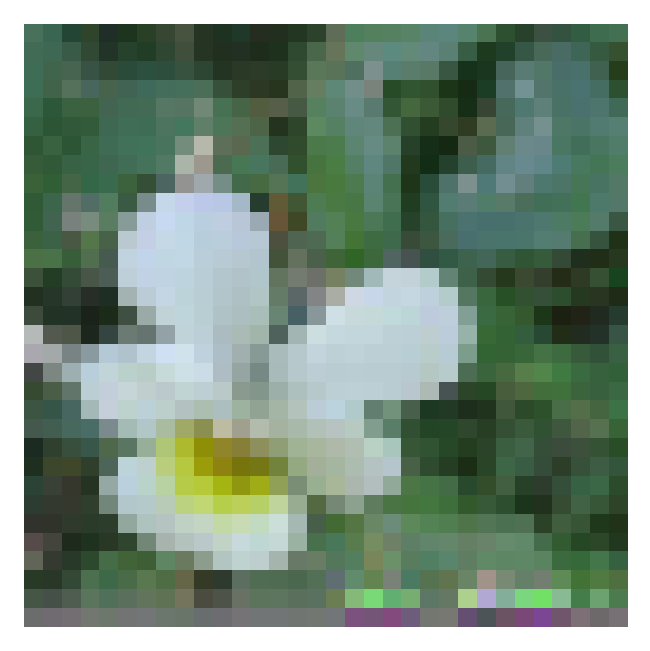

In [18]:
# img = cv2.imread('../train/Pansy_1342.jpg')
img = cv2.imread('../subsample/Pansy_1342.0.jpg')
img = cv2.resize(img, (32,32))
print(img.shape)
plt.figure(dpi = 200)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

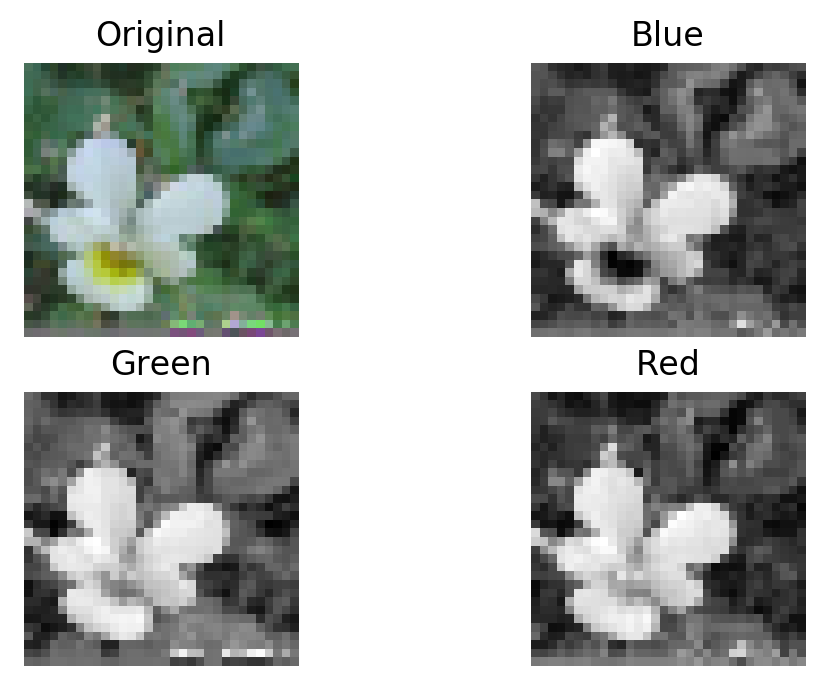

In [19]:
img_name = ['Original','Blue','Green','Red']
plt.figure(dpi = 200)
plt.subplot(2,2,1),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(img_name[0]) 
plt.xticks([])
plt.yticks([])
plt.axis('off')
for channel in range(3):
#     misc.imsave('./'+img_name[channel+1]+'.jpg', img[:,:,channel])
    plt.subplot(2,2,channel+2),plt.imshow(img[:,:,channel],plt.cm.gray)
    plt.title(img_name[channel+1]) 
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
# plt.savefig("channel_split.png")

/home/huiqy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


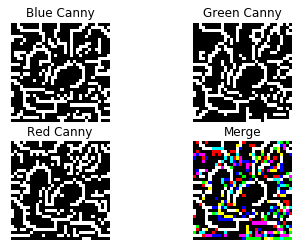

In [20]:
img_name = ['Blue Canny','Green Canny','Red Canny','Merge']
canny_list = np.zeros(shape=img.shape,dtype=np.uint8)
for channel in range(3):
    img_ch = img[:,:,channel]
#     img_ch = cv2.blur(img_ch,(5,5)) 
    canny_list[:,:,channel] = cv2.Canny(img_ch, 60, 150)
#     misc.imsave('./'+img_name[channel]+'.jpg', canny_list[:,:,channel])
    plt.subplot(2,2,channel+1),plt.imshow(canny_list[:,:,channel],plt.cm.gray)
    plt.title(img_name[channel]) 
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
canny_list = cv2.normalize(canny_list, canny_list,0,255,cv2.NORM_MINMAX) 
misc.imsave('./'+img_name[3]+'.jpg', cv2.cvtColor(canny_list, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4),plt.imshow(cv2.cvtColor(canny_list, cv2.COLOR_BGR2RGB))
plt.title(img_name[3]) 
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig("channel_split_canny.png")

/home/huiqy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  if __name__ == '__main__':
/home/huiqy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/huiqy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/huiqy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/huiqy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: Deprecat

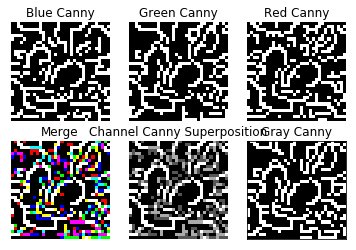

In [21]:
img_name = ['Blue Canny','Green Canny','Red Canny','Merge','Channel Canny Superposition','Gray Canny']
canny_superposition = np.zeros(shape=(img.shape[0],img.shape[1]),dtype=np.uint16)
canny_list = np.zeros(shape=img.shape,dtype=np.uint8)
for channel in range(3):
    img_ch = img[:,:,channel]
#     img_ch = cv2.blur(img_ch,(3,3)) 
    canny_list[:,:,channel] = cv2.Canny(img_ch, 60, 150)
    canny_superposition =  canny_superposition + (canny_list[:,:,channel]).astype(np.uint16)
    misc.imsave('./'+img_name[channel]+'.jpg', canny_list[:,:,channel])
    plt.subplot(2,3,channel+1),plt.imshow(canny_list[:,:,channel],plt.cm.gray)
    plt.title(img_name[channel]) 
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    
canny_list = cv2.normalize(canny_list, canny_list,0,255,cv2.NORM_MINMAX) 
misc.imsave('./'+img_name[3]+'.jpg', cv2.cvtColor(canny_list, cv2.COLOR_BGR2RGB))
plt.subplot(2,3,4),plt.imshow(cv2.cvtColor(canny_list, cv2.COLOR_BGR2RGB))
plt.title(img_name[3]) 
plt.xticks([])
plt.yticks([])
plt.axis('off')

canny_superposition = cv2.normalize(canny_superposition, canny_superposition,0,255,cv2.NORM_MINMAX)
canny_superposition = (canny_superposition).astype(np.uint8)
# canny_superposition = cv2.GaussianBlur(canny_superposition,(3,3),0)
# ret,canny_superposition = cv2.threshold(canny_superposition,30,255,cv2.THRESH_BINARY)
misc.imsave('./'+img_name[4]+'.jpg', canny_superposition)
plt.subplot(2,3,5),plt.imshow(canny_superposition,plt.cm.gray)
plt.title(img_name[4]) 
plt.xticks([])
plt.yticks([])
plt.axis('off')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
misc.imsave('./'+'Gray'+'.jpg', gray)
# gray = cv2.blur(gray,(3,3)) 
canny = cv2.Canny(gray, 50, 150)
canny = cv2.normalize(canny, canny,0,255,cv2.NORM_MINMAX) 
misc.imsave('./'+img_name[5]+'.jpg', canny)
plt.subplot(2,3,6),plt.imshow(canny,plt.cm.gray)
plt.title(img_name[5]) 
plt.xticks([])
plt.yticks([])
plt.savefig("channel_canny_superposition.png")